# IoT malware detection using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of IoT malware

Raw data from: TON_IoT [1]

-----------------------------------------------------------------------
[1] Nour Moustafa. A new distributed architecture for evaluating ai-based security systems at the edge: Network ton iot datasets. Sustainable Cities and Society, 72:102994, 2021

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../cnsm_final_datasets/ton_iot_multiclass.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,224.0.0.251,192.168.1.133,10,0,792,0,1.554220e+09,1.554221e+09,5353,...,5761.260206,0.020375,0.468631,0.316306,-0.194402,3.822014,19.214476,0.234228,0.015639,clear
1,1,ff02::fb,fe80::1087:c341:7263:ead3,11,0,858,0,1.554220e+09,1.554221e+09,5353,...,6672.787492,0.020176,0.479667,0.336345,-0.237233,4.256757,17.573316,-0.423359,0.015325,clear
2,2,192.168.1.192.,192.168.1.152,2534,0,1536348,0,1.554220e+09,1.554221e+09,40571,...,87651.532914,0.998411,0.632954,0.306152,0.167644,97.442938,0.113074,0.849697,1.000000,clear
3,3,192.168.1.190.,192.168.1.152,2405,0,1493560,0,1.554220e+09,1.554221e+09,43539,...,83069.432047,0.998212,0.681201,0.291605,0.155068,123.650232,0.124636,0.515143,1.000000,clear
4,4,192.168.1.152.,192.168.1.190,2396,0,0,0,1.554220e+09,1.554221e+09,1880,...,67142.382666,0.997815,0.661169,0.341646,-0.484312,138.660387,0.976712,0.433093,0.831995,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467409,3467409,52.147.9.175.,192.168.1.195,11,0,2356,0,1.556365e+09,1.556365e+09,443,...,29592.939850,0.006667,0.500012,0.287566,-0.016614,1.180994,0.023824,-0.992936,1.000000,xss
3467410,3467410,52.147.9.175.,192.168.1.195,10,0,2280,0,1.556365e+09,1.556365e+09,443,...,-240826.912312,0.008455,0.499121,0.281868,NaN,6.529773,2.196577,-0.000199,0.995996,xss
3467411,3467411,192.168.1.195.,52.147.9.175,10,0,7763,0,1.556365e+09,1.556365e+09,51670,...,2628.170455,0.006667,0.513832,0.288496,0.027189,1.085204,0.147369,0.852677,0.671281,xss
3467412,3467412,192.168.1.195.,52.147.9.175,10,0,7600,0,1.556365e+09,1.556365e+09,51778,...,37295.429950,0.008455,0.518571,0.284595,NaN,3.657879,3.133762,-0.000199,0.824852,xss


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]

    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,224.0.0.251,192.168.1.133,10,0,792,0,1.554220e+09,1.554221e+09,5353,5353,139,140.0,11.445523,131,-0.847845,130.00,150.0,126,150,24,150,8.234189,10,7.194245,139.625213,0.500000,0.500000,-0.961074,24.201602,4.287953,1.333899e-04,1.581810e-04,0.100000,0.874133,1.485475,0.447173,0.675573,False,0.602060,0.000000,1.000000,0.267197,0.625000,12.751683,11.546521,3.973819,14.582449,47.723840,5.302649,2.930586,0.105342,26.960027,0.196686,False,1.111111,False,0.0,1.000000,1242,1.0,False,0,0.000000,1.034798e-04,0.953453,0.765573,0.999801,0.249463,0.245946,0.01341,1247.316951,1683.058849,1.656597e+04,5761.260206,0.020375,0.468631,0.316306,-0.194402,3.822014,19.214476,0.234228,True,clear,1
1,1,ff02::fb,fe80::1087:c341:7263:ead3,11,0,858,0,1.554220e+09,1.554221e+09,5353,5353,138,130.0,11.575837,134,-0.845218,128.00,150.0,126,150,24,150,8.388288,10,7.246377,138.441980,0.545455,0.454545,-1.036642,24.533863,-3.041708,-2.862945e-19,-3.336314e-19,0.090909,0.902084,1.539485,0.445011,0.715793,False,0.602060,0.000000,1.000000,0.262991,0.575000,12.550874,10.536604,3.973608,14.582614,47.723620,4.772362,2.422591,0.104397,26.960008,0.177016,False,1.000000,False,0.0,1.000000,1368,1.0,False,0,0.000000,1.786456e-05,0.953825,0.467772,0.044413,0.224073,0.248517,0.03408,1120.366194,1534.385582,1.857421e+04,6672.787492,0.020176,0.479667,0.336345,-0.237233,4.256757,17.573316,-0.423359,True,clear,1
2,2,192.168.1.192.,192.168.1.152,2534,0,1536348,0,1.554220e+09,1.554221e+09,40571,1880,666,579.0,454.946151,206976,-0.188282,417.00,933.0,64,2673,2609,64,68.310233,382,57.357357,806.747481,0.531965,0.468035,1.323234,3.119050,0.492374,3.118073e-09,3.119921e-09,0.034884,2.775578,6.380793,0.564312,0.578712,False,0.714878,0.001000,0.542108,0.498117,0.975651,149.388050,148.001666,75.689032,224.696690,299.905341,0.118399,0.088413,0.000009,0.869108,0.136231,False,1.950257,True,0.0,0.542108,340327,1.0,False,0,0.000000,1.936269e-08,0.019443,0.149309,0.999007,0.000200,0.000867,0.00000,0.997638,10.317111,1.748741e+06,87651.532914,0.998411,0.632954,0.306152,0.167644,97.442938,0.113074,0.849697,True,clear,1
3,3,192.168.1.190.,192.168.1.152,2405,0,1493560,0,1.554220e+09,1.554221e+09,43539,1880,681,579.0,480.631876,231007,-0.172488,418.00,933.0,64,2673,2609,64,70.577368,394,57.856094,833.488650,0.523493,0.476507,1.283727,3.045990,0.686459,2.059728e-10,2.061014e-10,-0.021359,3.295854,6.332938,0.563839,0.584333,False,0.717256,0.001000,0.544085,0.499061,0.976637,149.670896,148.796587,75.688963,225.342053,299.905281,0.124753,0.097319,0.000013,0.869398,0.143493,False,1.982529,False,0.0,0.544085,328862,1.0,False,0,0.000000,3.533646e-09,0.027379,0.483864,0.999007,0.000221,0.001266,0.00000,1.107110,10.272353,1.584060e+06,83069.432047,0.998212,0.681201,0.291605,0.155068,123.650232,0.124636,0.515143,True,clear,1
4,4,192.168.1.152.,192.168.1.190,2396,0,0,0,1.554

In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
10853,backdoor,0
0,clear,1
78648,dos,2
721672,injection,3
1128699,mitm,4
1133581,password,5
1609230,runsomware,6
1631832,scanning,7
1962456,xss,8


In [8]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['backdoor',
 'clear',
 'dos',
 'injection',
 'mitm',
 'password',
 'runsomware',
 'scanning',
 'xss']

In [9]:
df = df[["LABEL_code"] + features].copy()

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [11]:
df.shape

(1592464, 74)

In [12]:
df_validation = df.sample(n = 250000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
y_train.value_counts()

8.0    578314
5.0    143954
3.0     89476
2.0     86431
7.0     23479
6.0      6672
0.0      5014
1.0      4591
4.0      1793
Name: LABEL_code, dtype: int64

In [16]:
y_test.value_counts()

8.0    247849
5.0     61694
3.0     38347
2.0     37042
7.0     10063
6.0      2860
0.0      2149
1.0      1967
4.0       769
Name: LABEL_code, dtype: int64

In [17]:
df_validation["LABEL_code"].value_counts()

8.0    154591
5.0     37838
3.0     23942
2.0     22558
7.0      6252
6.0      1788
0.0      1325
1.0      1212
4.0       494
Name: LABEL_code, dtype: int64

In [18]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 9, 2),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 200, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [19]:
df_to_tune = df_features.sample(n=100000)
best_hyperparams = tunne_together_XGBoost_classification(df_to_tune, features, verbose=False)

100%|██████████| 100/100 [28:08<00:00, 16.88s/trial, best loss: -0.7669414509786846]
The best hyperparameters are :  

{'colsample_bytree': 0.6148487354571744, 'gamma': 1.8223592972666023, 'max_depth': 6.0, 'min_child_weight': 7.0, 'n_estimators': 160.0, 'reg_alpha': 1.0, 'reg_lambda': 0.3605971226852602}


In [20]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

    backdoor     0.4598    0.5849    0.5148      2149
       clear     0.9395    0.9075    0.9232      1967
         dos     0.9446    0.9533    0.9489     37042
   injection     0.9799    0.9561    0.9679     38347
        mitm     0.6114    0.2783    0.3825       769
    password     0.9867    0.9787    0.9827     61694
  runsomware     0.8309    0.7577    0.7926      2860
    scanning     0.8237    0.7928    0.8079     10063
         xss     0.9888    0.9952    0.9920    247849

    accuracy                         0.9744    402740
   macro avg     0.8406    0.8005    0.8125    402740
weighted avg     0.9745    0.9744    0.9742    402740



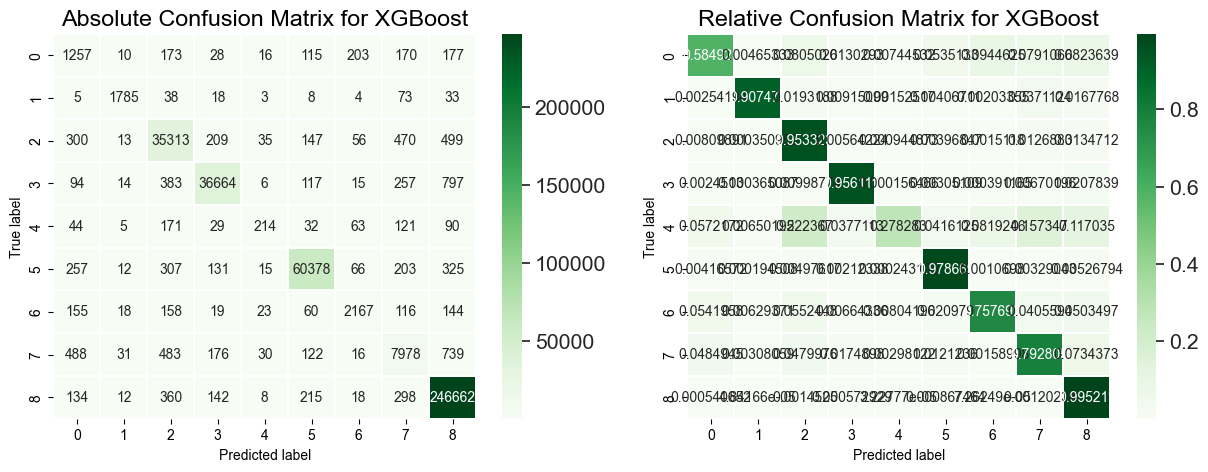

In [21]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [22]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [23]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=10)

9
              precision    recall  f1-score   support

    backdoor     0.4579    0.6077    0.5223      2149
       clear     0.9271    0.8988    0.9128      1967
         dos     0.9446    0.9503    0.9475     37042
   injection     0.9801    0.9570    0.9684     38347
        mitm     0.6253    0.3017    0.4070       769
    password     0.9861    0.9793    0.9827     61694
  runsomware     0.8522    0.7580    0.8024      2860
    scanning     0.8152    0.7908    0.8028     10063
         xss     0.9891    0.9950    0.9920    247849

    accuracy                         0.9742    402740
   macro avg     0.8420    0.8043    0.8153    402740
weighted avg     0.9745    0.9742    0.9742    402740



# Evaluation of model

              precision    recall  f1-score   support

    backdoor     0.4418    0.5842    0.5031      1325
       clear     0.9289    0.9059    0.9173      1212
         dos     0.9457    0.9495    0.9476     22558
   injection     0.9802    0.9592    0.9696     23942
        mitm     0.6214    0.2591    0.3657       494
    password     0.9867    0.9771    0.9819     37838
  runsomware     0.8455    0.7836    0.8134      1788
    scanning     0.8155    0.7933    0.8043      6252
         xss     0.9888    0.9950    0.9919    154591

    accuracy                         0.9742    250000
   macro avg     0.8394    0.8008    0.8105    250000
weighted avg     0.9745    0.9742    0.9741    250000



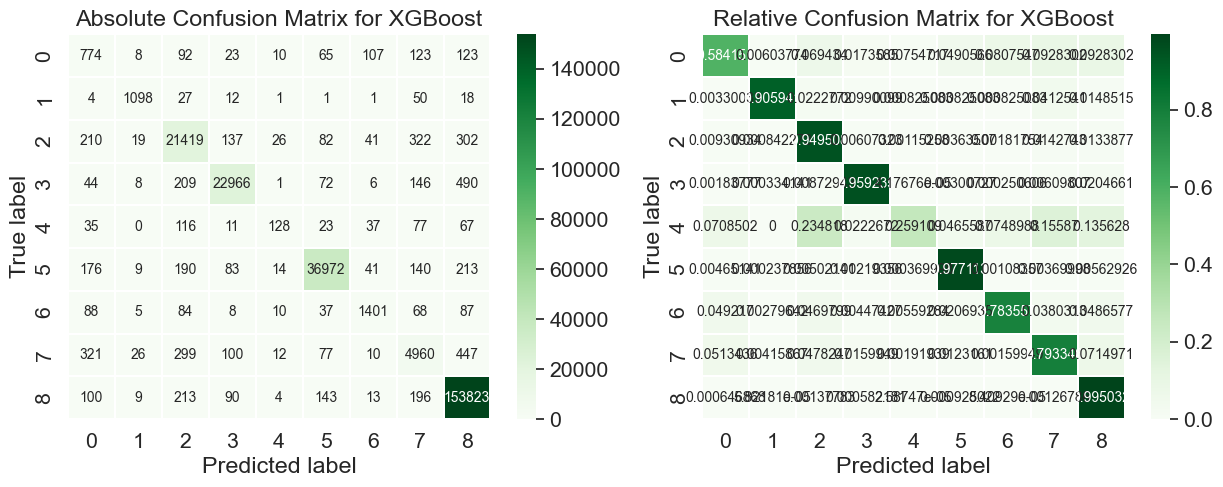

In [24]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [25]:
report = classification_report(y_validation, y_pred, target_names=classifications_array,digits=4)

import csv

problem = "TON_IoT-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

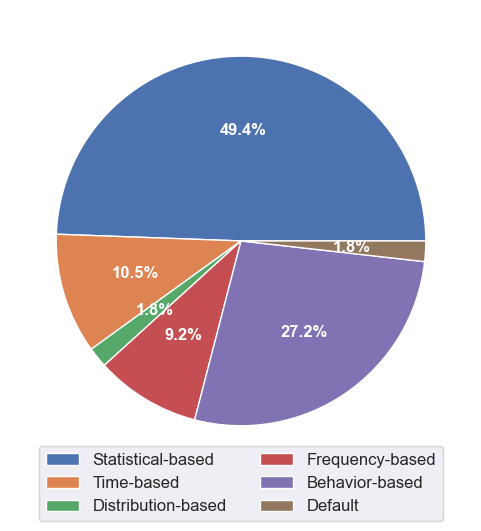

In [26]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [27]:
data

[0.4917289, 0.104919985, 0.01777579, 0.09169824, 0.27112883, 0.01777579]

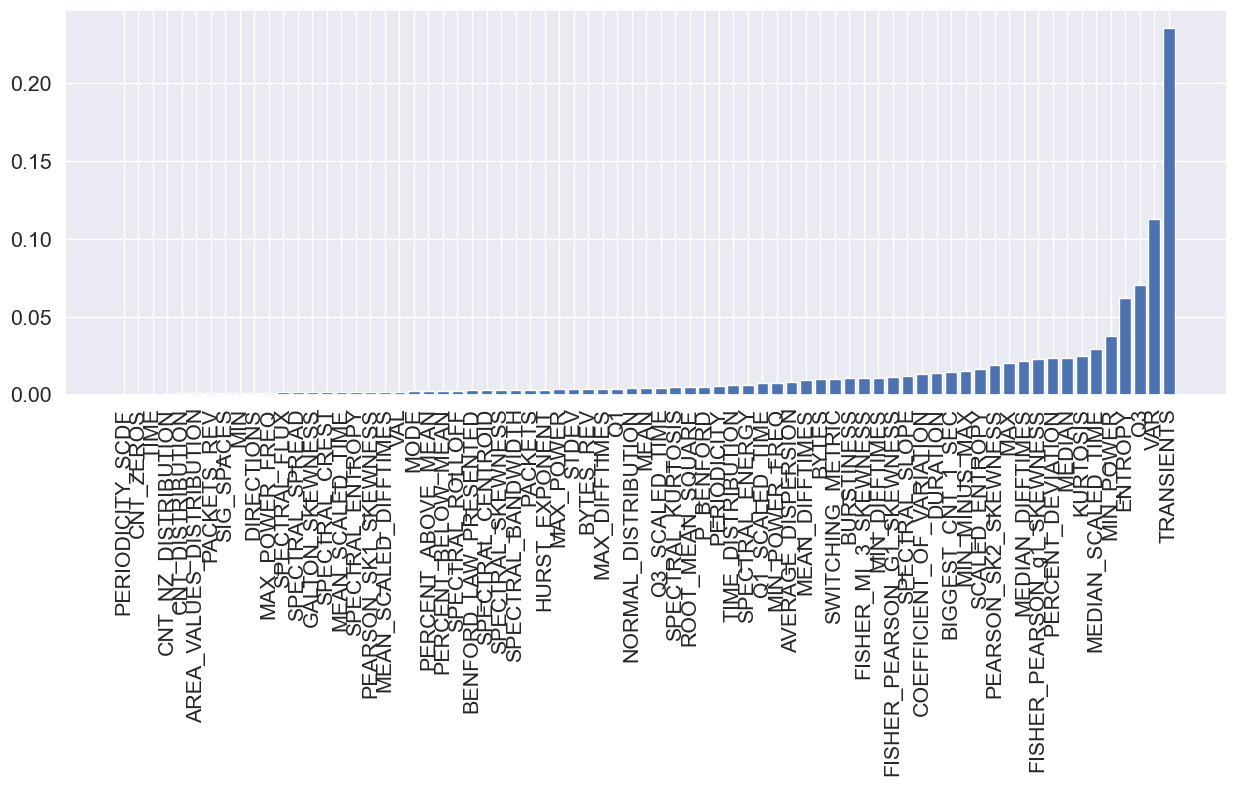

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [29]:
feat_importances

PERIODICITY_SCDF       0.000000
CNT_ZEROS              0.000000
TIME                   0.000568
CNT_NZ_DISTRIBUTION    0.000754
CNT_DISTRIBUTION       0.000774
                         ...   
MIN_POWER              0.037920
ENTROPY                0.061955
Q3                     0.070043
VAR                    0.112390
TRANSIENTS             0.235094
Length: 73, dtype: float32

In [30]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'CNT_ZEROS': 0.0,
 'TIME': 0.0005675131687894464,
 'CNT_NZ_DISTRIBUTION': 0.0007542148232460022,
 'CNT_DISTRIBUTION': 0.0007737437845207751,
 'AREA_VALUES_DISTRIBUTION': 0.0008853903855197132,
 'PACKETS_REV': 0.000977683812379837,
 'SIG_SPACES': 0.0010446666274219751,
 'MIN': 0.001109731150791049,
 'DIRECTIONS': 0.0011706935474649072,
 'MAX_POWER_FREQ': 0.0013462045462802052,
 'SPECTRAL_FLUX': 0.001629189937375486,
 'SPECTRAL_SPREAD': 0.0016477658646181226,
 'GALTON_SKEWNESS': 0.0018369454191997647,
 'SPECTRAL_CREST': 0.001928099081851542,
 'MEAN_SCALED_TIME': 0.0019389829831197858,
 'SPECTRAL_ENTROPY': 0.0019580016378313303,
 'PEARSON_SK1_SKEWNESS': 0.001979178749024868,
 'MEAN_SCALED_DIFFTIMES': 0.0019975784234702587,
 'VAL': 0.0020343922078609467,
 'MODE': 0.002157556125894189,
 'PERCENT_ABOVE_MEAN': 0.0022135265171527863,
 'PERCENT_BELOW_MEAN': 0.0022963371593505144,
 'SPECTRAL_ROLLOFF': 0.0023536784574389458,
 'BENFORD_LAW_PRESENTED': 0.00273600034415721

# FEATURE SELECTION

In [31]:
def perform_val(selected_features, cycles = 5, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [32]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [22:09<00:00, 13.29s/trial, best loss: -0.7349371131484366]
The best hyperparameters are :  

{'colsample_bytree': 0.7964739640972414, 'gamma': 1.6197084574328495, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 100.0, 'reg_alpha': 1.0, 'reg_lambda': 0.5243972609991416}
0.7926966360838273
100%|██████████| 100/100 [14:17<00:00,  8.58s/trial, best loss: -0.7541729442362606]
The best hyperparameters are :  

{'colsample_bytree': 0.4670672063999305, 'gamma': 2.619251211741439, 'max_depth': 8.0, 'min_child_weight': 5.0, 'n_estimators': 120.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7579752408439577}
0.8009862103039175
100%|██████████| 100/100 [14:34<00:00,  8.75s/trial, best loss: -0.7648120781014176]
The best hyperparameters are :  

{'colsample_bytree': 0.6666856918614867, 'gamma': 1.0855917912675266, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 100.0, 'reg_alpha': 0.0, 'reg_lambda': 0.2950823412730236}
0.8054873187414696
100%|██████████| 100/10

In [33]:
problem = "TON_IoT-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])